# Simple 1D Random Walk

The simplest random walk consists of a walker that moves left or right by a discrete distance of $\pm{1}$ at each step with equal probability of moving in either direction. 

Each step is defined: $$x_{n}=x_{n-1}+\Delta{x}$$

where $\Delta{x}$ is a random variable that can be either $+1$ or $-1$. 

In [ ]:
# Simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=1000 # The number of steps in the walk

# Model
steps=np.random.choice([-1, 1], size=num_steps)
position=np.cumsum(steps)

# Plotting
plt.plot(position)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

## Scaling to time

The model is time independent in its current form. Let's define a timestep $\tau$ such that $$t=n\tau$$

where t is time in seconds, n is the number of steps, and $\tau$ is the time required to move one full step. 

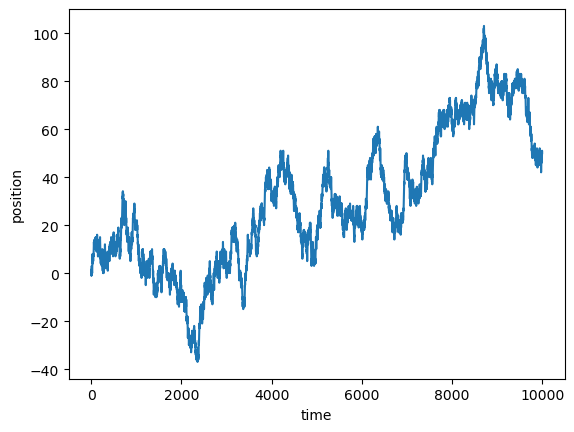

In [21]:
# Simple 1D random walk scaled to time

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**5 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
t=int(num_steps * time_step)

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

# Plotting
plt.plot(position)
plt.xlabel('time')
plt.ylabel('position')
plt.show()

## Expectation and Variance

The expectation of the position of the random walker is given by the general relation

$$E(X)=\sum{xP(x_{i})}$$ 

and after one step

$$E(X_{1})=(1)\times\frac{1}{2}+(-1)\times\frac{1}{2} = 0$$

The expectation after N steps is given by $$E(X_{N})=\sum_{i=1}^N {E(\Delta{x_{i}}})$$

Note that this can be scaled to time with $t=N\tau$. 

In addition to the expected value of the random walk at after a certain number of steps or a given time, we are also interested in the variance of the walk and how that variance might change over the duration of the walk. 

The variance for a single step is defined $$VAR(\Delta{x})=E(\Delta{x^{2}})-E(\Delta{x})^{2}) = (1)^{2}\times\frac{1}{2}+(-1)^{2}\times\frac{1}{2} - (0)^{2} = 1$$

The variance after N steps is $$\sum_{i=1}^N{VAR(X_{N})}=N\times{1}$$

So as the walk evolves, the expected (average) position is 0, but the variance grows approximately linearly with time or the number of steps. The variance is also known as the mean squared displacement.

The standard deviation grows as the $\sqrt{N}$

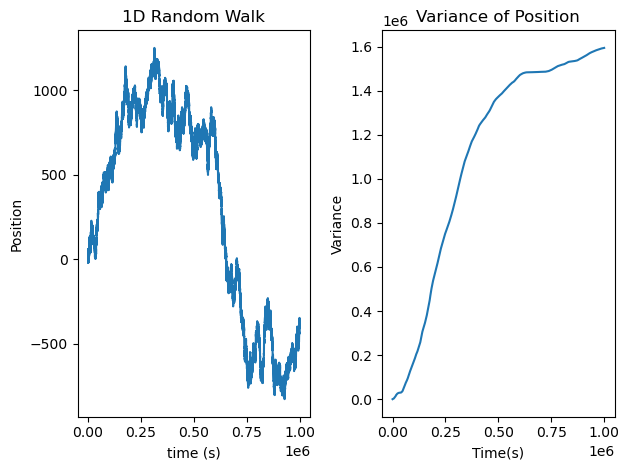

In [32]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**7 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
t=int(num_steps * time_step)

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

squared_displacement=position ** 2
variance=np.cumsum(squared_displacement / np.arange(1, t + 1))

# Plot the random walk position
plt.subplot(1, 2, 1)
plt.plot(position)
plt.title("1D Random Walk")
plt.xlabel("time (s)")
plt.ylabel("Position")

# Plot the variance over steps
plt.subplot(1, 2, 2)
plt.plot(variance)
plt.title("Variance of Position")
plt.xlabel("Time(s)")
plt.ylabel("Variance")

plt.tight_layout()
plt.show()

## Adding Plot Animation

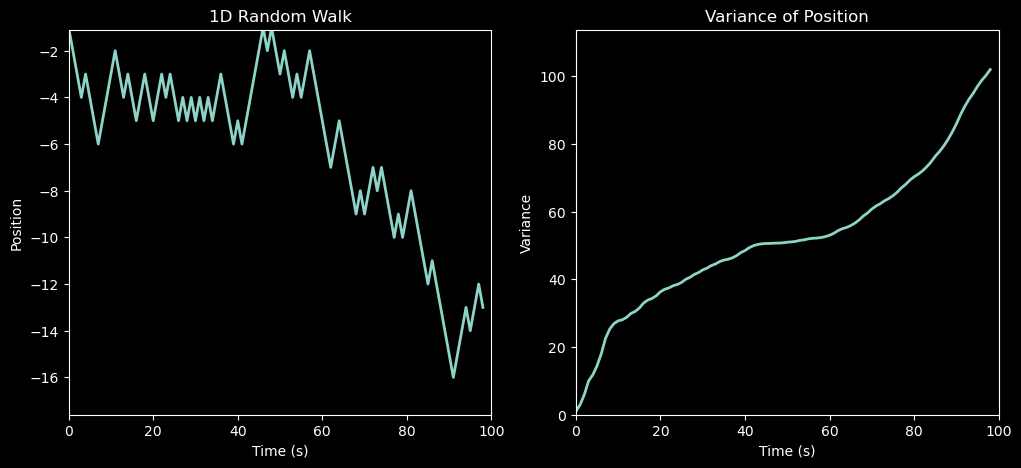

In [47]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Parameters
num_steps=10**3 # The number of steps in the walk
time_step = 0.1 # Time required for one full step
t=int(num_steps * time_step)

# Model

steps=np.random.choice([-1, 1], size=t)

position=np.cumsum(steps)

squared_displacement=position ** 2
variance=np.cumsum(squared_displacement / np.arange(1, t + 1))


# Animated Plots
with plt.style.context("dark_background"):
    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Initialize lines for position and variance
    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    # Set up the axes limits and labels
    ax1.set_xlim(0, t)
    ax1.set_ylim(position.min() * 1.1, position.max() * 1.1)
    ax1.set_title("1D Random Walk")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Position")

    ax2.set_xlim(0, t)
    ax2.set_ylim(0, variance.max() * 1.1)
    ax2.set_title("Variance of Position")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Variance")

    # Initialization function to clear the data at the start of the animation
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        return line1, line2

    # Update function for each frame
    def update(frame):
        # Update position line (up to current frame)
        line1.set_data(np.arange(frame), position[:frame])
    
        # Update variance line (up to current frame)
        line2.set_data(np.arange(frame), variance[:frame])
    
        return line1, line2

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(1, t, int(t / 100)),  # Use a subset of frames
                    init_func=init, blit=False, interval=10)


    # Save the animation as an MP4 using ffmpeg
    ani.save("random_walk_dark.mp4", writer="ffmpeg", fps=30)

# Display the saved video in Jupyter Notebook (optional)
Video("random_walk_dark.mp4", embed=True)